<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/CART.xlsx')
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


**Data Enncoding**

In [0]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [0]:
le_age=LabelEncoder()
le_income=LabelEncoder()
le_student=LabelEncoder()
le_credit_rating=LabelEncoder()
le_buys_computer=LabelEncoder()

In [55]:
data['age_n']=le_age.fit_transform(data['age'])
data['income_n']=le_income.fit_transform(data['income'])
data['student_n']=le_student.fit_transform(data['student'])
data['credit_rating_n']=le_student.fit_transform(data['credit_rating'])
data['buys_computer_n']=le_buys_computer.fit_transform(data['buys_computer'])
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [58]:
data_new=data.drop(['age','income','student','credit_rating','buys_computer'],axis='columns')
data_new

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1
5,6,1,1,1,0,0
6,7,0,1,1,0,1
7,8,2,2,0,1,0
8,9,2,1,1,1,1
9,10,1,2,1,1,1


In [61]:
feature_cols=['age_n','income_n','student_n','credit_rating_n']
x=data_new.drop(['buys_computer_n','RID'],axis='columns')
y=data_new['buys_computer_n']
x

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [63]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int64

**Building the Decision Tree Model**

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
dt=clf.fit(x,y)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
!pip install graphviz

In [66]:
!pip install pydotplus

**Visualizing Decision Tree**

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [69]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')

True

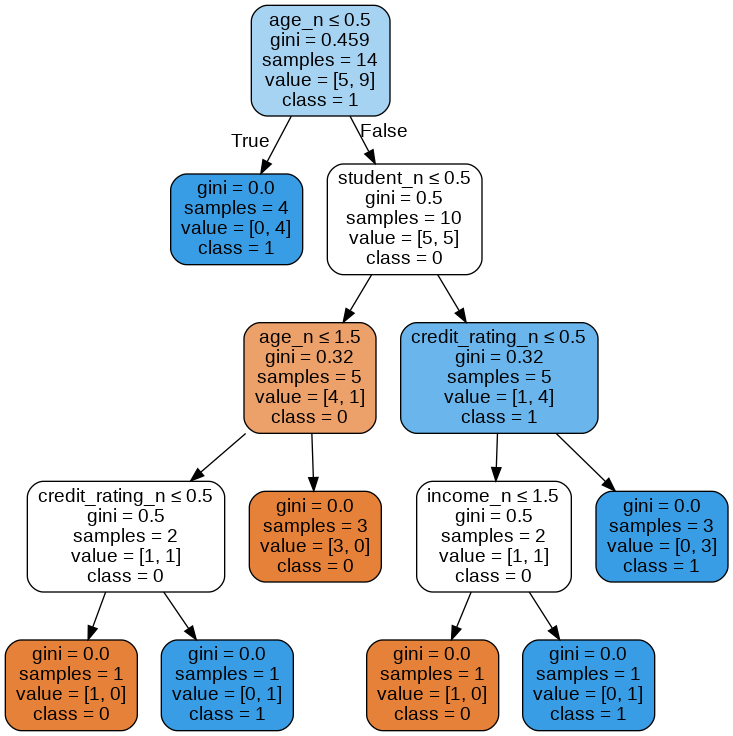

In [70]:
Image(graph.create_png())

**Splitting Data set**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

**Building Decision Tree Model**

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
dt=clf.fit(x_train,y_train)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Evaluating Model**

In [0]:
from sklearn import metrics

In [81]:
y_pred=clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.75


**Visualizing Decision Tree**

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [83]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')

True

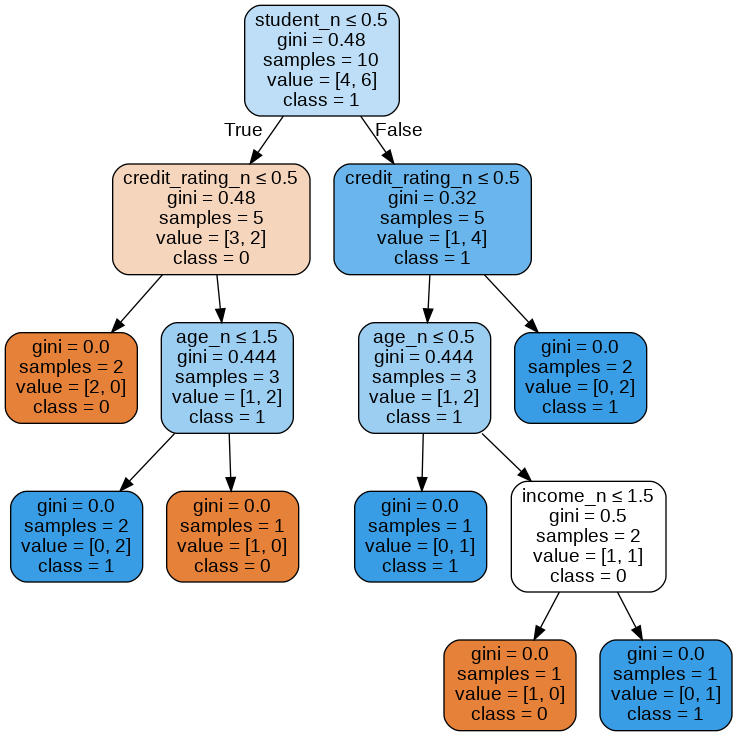

In [84]:
Image(graph.create_png())